# Imports

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/user/github/phd/sentiment-backend/')

from typing import NamedTuple, List
from more_itertools import flatten

import numpy as np
import pandas as pd

from tqdm import tqdm

from aspects.data_io import serializer
from aspects.utilities import settings
from aspects.utilities.data_paths import ExperimentPaths

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 215 kB 1.0 MB/s eta 0:00:01


# Load experiment data

In [17]:
experiment_paths = ExperimentPaths(
    input_path='',
    output_path=settings.DEFAULT_OUTPUT_PATH / 'reviews_Cell_Phones_and_Accessories-50000-docs',
#     output_path=settings.DEFAULT_OUTPUT_PATH / 'reviews_Apps_for_Android',
#         output_path=settings.DEFAULT_OUTPUT_PATH / 'reviews_Amazon_Instant_Video',
    experiment_name='our'
)

aspect_graph = serializer.load(experiment_paths.aspect_to_aspect_graph)

aspect_graph.number_of_nodes()

7210

In [18]:
df = pd.read_pickle(experiment_paths.conceptnet_hierarchy_neighborhood)

In [19]:
skip_values = [2147483647, 0]

In [21]:
df = df[~(
    (df.shortest_distance_aspect_graph.isin(skip_values)) |
    (df.shortest_distance_conceptnet.isin(skip_values))
)]

In [22]:
df['shortest_paths_differences'] = df.shortest_distance_conceptnet - df.shortest_distance_aspect_graph

In [36]:
df.drop_duplicates(subset=['aspect_1', 'aspect_2'])

,aspect_1,aspect_2,shortest_distance_aspect_graph,shortest_distance_conceptnet,shortest_paths_differences
1,case,pieces,1,2,1
2,case,price,1,4,3
3,case,use,1,2,1
4,case,nook,3,3,0
5,case,quality,1,2,1
...,...,...,...,...,...
2824066,indonesia,aluminum,4,5,1
2824067,indonesia,materials,5,6,1
2824069,indonesia,customizability,5,5,0
2824076,indonesia,middle east,1,5,4


In [90]:
df_sample = df.sample(150000)

In [91]:
import seaborn as sns; sns.set(color_codes=True)

In [97]:
df = df[df.shortest_distance_aspect_graph < 10]

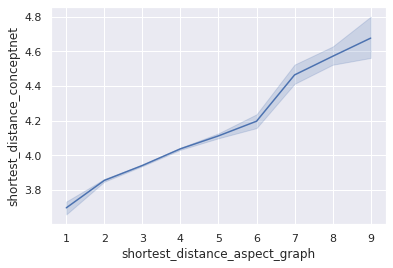

In [98]:
sns.lineplot(x=df.shortest_distance_aspect_graph, y=df.shortest_distance_conceptnet)

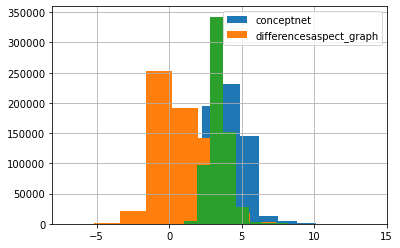

In [39]:
df.shortest_distance_conceptnet.hist()
df.shortest_paths_differences.hist()
df.shortest_distance_aspect_graph.hist()
plt.legend([    
    'conceptnet', 
    'differences'
    'aspect_graph', 
])

In [78]:
df.describe()

,shortest_distance_aspect_graph,shortest_distance_conceptnet,shortest_paths_differences
count,628757.000000,628757.000000,628757.000000
mean,3.193919,3.960937,0.767018
std,0.825714,1.171342,1.387492
min,1.000000,1.000000,-7.000000
25%,3.000000,3.000000,0.000000
50%,3.000000,4.000000,1.000000
75%,4.000000,5.000000,2.000000
max,10.000000,14.000000,11.000000


In [51]:
df_filtered = df[df.shortest_distance_aspect_graph < 6]
df_filtered = df_filtered[df_filtered.shortest_distance_aspect_graph > 1]

In [82]:
df.groupby(by='shortest_distance_aspect_graph').agg({'shortest_distance_conceptnet':'mean'})

,shortest_distance_conceptnet
shortest_distance_aspect_graph,
1,3.697392
2,3.855540
3,3.941786
4,4.037669
5,4.112294
6,4.196737
7,4.463710
8,4.570975
9,4.675799


In [81]:
df.groupby(by='shortest_distance_aspect_graph').agg({'shortest_paths_differences':'mean'})

,shortest_paths_differences
shortest_distance_aspect_graph,
1,2.697392
2,1.855540
3,0.941786
4,0.037669
5,-0.887706
6,-1.803263
7,-2.536290
8,-3.429025
9,-4.324201


In [63]:
sorted_path_distances = list(df.shortest_distance_aspect_graph.value_counts().keys())

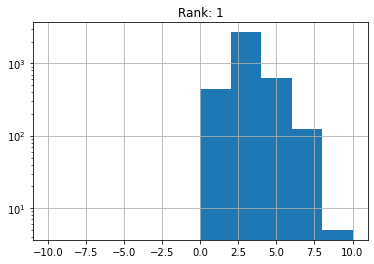

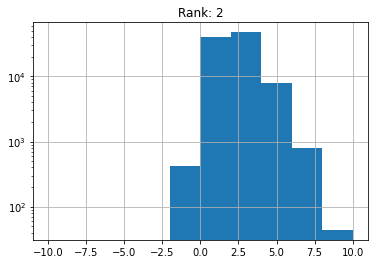

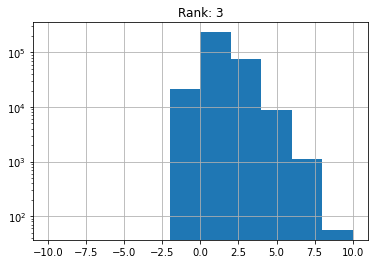

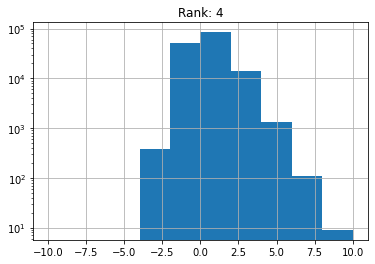

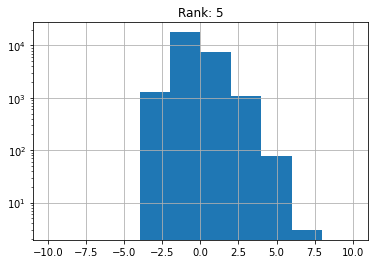

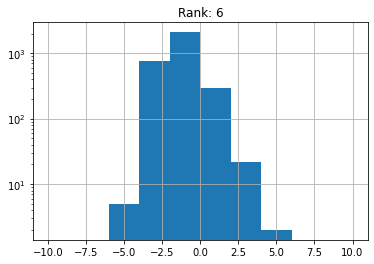

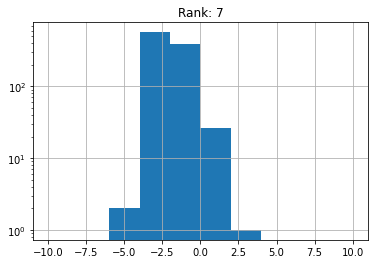

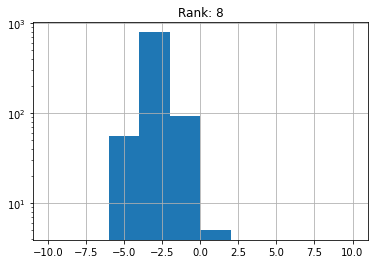

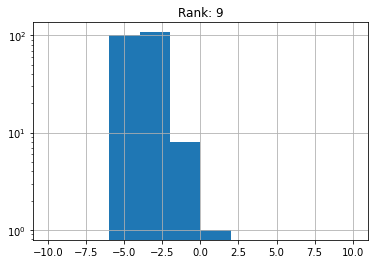

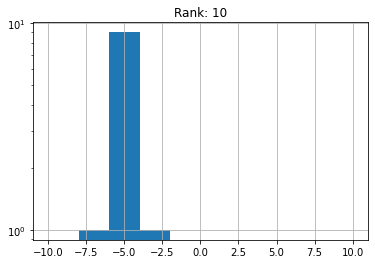

In [77]:
legend = []
for rank, path_distance in df.groupby(by='shortest_distance_aspect_graph'):
    path_distance = rank
    plt.figure()
    df[df.shortest_distance_aspect_graph == path_distance].shortest_paths_differences.hist(range=(-10, 10), log=True)
    plt.title(f'Rank: {path_distance}')

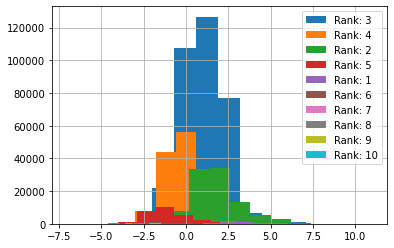

In [70]:
legend = []
for path_distance in sorted_path_distances:
    legend += [f'Rank: {path_distance}']
    df[df.shortest_distance_aspect_graph == path_distance].shortest_paths_differences.hist()
plt.legend(legend)

## Degree distribution

### Without directions 

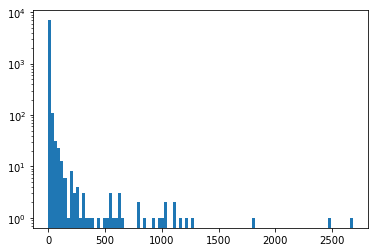

In [16]:
degrees = [aspect_graph.degree(n) for n in aspect_graph.nodes()]
plt.hist(degrees, bins=100, log=True)
plt.show()

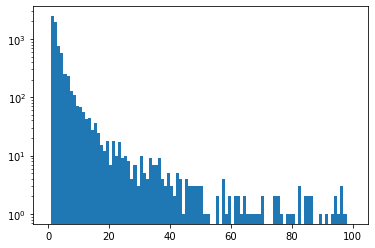

In [17]:
degrees = [aspect_graph.degree(n) for n in aspect_graph.nodes()]
plt.hist(degrees, bins=100, log=True, range=(0, 100))
plt.show()

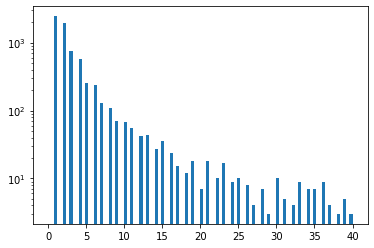

In [18]:
degrees = [aspect_graph.degree(n) for n in aspect_graph.nodes()]
plt.hist(degrees, bins=100, log=True, range=(0, 40))
plt.show()

In [19]:
np.mean([aspect_graph.degree(n) for n in aspect_graph.nodes()])

9.157281553398057

### Out degree

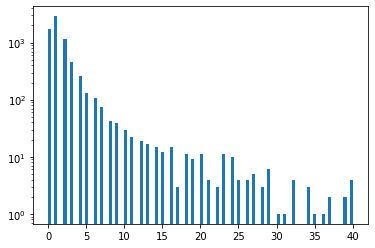

In [20]:
degrees = [aspect_graph.out_degree(n) for n in aspect_graph.nodes()]
plt.hist(degrees, bins=100, log=True, range=(0, 40))
plt.show()

In [21]:
np.mean([aspect_graph.out_degree(n) for n in aspect_graph.nodes()])

4.578640776699029

# Get neighborhood dump info

In [22]:
conceptnet_hierarchy_neighborhood = serializer.load(experiment_paths.conceptnet_hierarchy_neighborhood)

In [23]:
neighborhood_df = pd.DataFrame([
    neighborhood
    for aspect, metadata in conceptnet_hierarchy_neighborhood.items()
    for neighborhood in metadata
])            

In [24]:
neighborhood_df

,name,rank,neighbors_names,neighbors_path_lens,neighbors_cn_path_lens,aspects_not_in_conceptnet,cn_hierarchy_confirmed
0,case,1,"[pieces, price, use, quality, shipping, batter...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 4, 2, 2, 2, 3, 2, 3, 4, 3, 2, 2, 2, 3, 2, ...","[pieces, price, use, quality, shipping, batter...",[]
1,case,2,"[ac, cord, update, siri, s3, kitkat, speakers,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3, 2, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, ...","[ac, cord, update, siri, s3, kitkat, speakers,...",[]
2,case,3,"[pieces, price, use, nook, quality, shipping, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[2, 4, 2, 3, 2, 2, 3, 3, 4, 3, 2, 2, 2, 2, 3, ...","[pieces, price, use, nook, quality, shipping, ...",[]
3,pieces,1,"[case, jawbone]","[1, 1]","[3, 4]","[case, jawbone]",[]
4,pieces,2,"[price, use, quality, shipping, battery, relia...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3, 2, 3, 3, 4, 3, 2, 4, 4, 3, 4, 3, 3, 2, 3, ...","[price, use, quality, shipping, battery, relia...",[]
...,...,...,...,...,...,...,...
5041,middle east,2,[],[],[],[],[]
5042,middle east,3,[],[],[],[],[]
5043,dap,1,[],[],[],[],[]
5044,dap,2,[],[],[],[],[]


In [25]:
# neighborhood_df['hierarchical_proportion'] = neighborhood_df.cn_hierarchy_confirmed.apply(lambda cn: sum(cn)/len(cn) if cn else 0)
# neighborhood_df = neighborhood_df[neighborhood_df.hierarchical_proportion>0.1]
# neighborhood_df.sort_values('hierarchical_proportion')

## Skip zero proportions 

In [26]:
# neighborhood_df = neighborhood_df[neighborhood_df.hierarchical_proportion > 0]

## Skip 0 len paths 

In [27]:
neighborhood_df.neighbors_cn_path_lens = neighborhood_df.neighbors_cn_path_lens.apply(lambda paths: [path for path in paths if path])

In [28]:
neighborhood_df

,name,rank,neighbors_names,neighbors_path_lens,neighbors_cn_path_lens,aspects_not_in_conceptnet,cn_hierarchy_confirmed
0,case,1,"[pieces, price, use, quality, shipping, batter...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 4, 2, 2, 2, 3, 2, 3, 4, 3, 2, 2, 2, 3, 2, ...","[pieces, price, use, quality, shipping, batter...",[]
1,case,2,"[ac, cord, update, siri, s3, kitkat, speakers,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3, 2, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, ...","[ac, cord, update, siri, s3, kitkat, speakers,...",[]
2,case,3,"[pieces, price, use, nook, quality, shipping, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[2, 4, 2, 3, 2, 2, 3, 3, 4, 3, 2, 2, 2, 2, 3, ...","[pieces, price, use, nook, quality, shipping, ...",[]
3,pieces,1,"[case, jawbone]","[1, 1]","[3, 4]","[case, jawbone]",[]
4,pieces,2,"[price, use, quality, shipping, battery, relia...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3, 2, 3, 3, 4, 3, 2, 4, 4, 3, 4, 3, 3, 2, 3, ...","[price, use, quality, shipping, battery, relia...",[]
...,...,...,...,...,...,...,...
5041,middle east,2,[],[],[],[],[]
5042,middle east,3,[],[],[],[],[]
5043,dap,1,[],[],[],[],[]
5044,dap,2,[],[],[],[],[]


## Remove aspects with no paths to any neighbor 

In [29]:
len(neighborhood_df)

5046

In [30]:
neighborhood_df = pd.concat([
    g 
    for _, g in tqdm(neighborhood_df.groupby('name')) 
    for _, row in g.iterrows()
    if len(row.neighbors_cn_path_lens) > 0
]).drop_duplicates(subset=['name', 'rank'])

100%|██████████| 1682/1682 [00:01<00:00, 1480.15it/s]


In [31]:
len(neighborhood_df)

1977

## Skip aspects without all ranks paths 

In [32]:
neighborhood_df = pd.concat([g for _, g in neighborhood_df.groupby('name') if len(g) == 3])

In [33]:
len(neighborhood_df)

1977

# Calculate differences between aspect graph shortests paths of neioghbors and cn shortest paths 

In [34]:
shortest_paths_diferences = []
    
for _, row in tqdm(neighborhood_df.iterrows()):
    rank = row['rank']
    if len(row.neighbors_path_lens) == len(row.neighbors_cn_path_lens):
        shortest_paths_diferences.append(
            np.subtract(
                np.array(row.neighbors_cn_path_lens), 
                np.array(row.neighbors_path_lens)
            )
        )

1977it [00:00, 3809.40it/s]


In [35]:
len(shortest_paths_diferences)

1977

In [36]:
neighborhood_df['shortest_paths_diferences'] = shortest_paths_diferences

In [37]:
assert len(neighborhood_df[neighborhood_df.shortest_paths_diferences.isna()]) == 0, 'Check number of paths'

In [38]:
neighborhood_df['shortest_paths_diferences_mean'] = neighborhood_df.shortest_paths_diferences.apply(np.mean)

/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [39]:
neighborhood_df

,name,rank,neighbors_names,neighbors_path_lens,neighbors_cn_path_lens,aspects_not_in_conceptnet,cn_hierarchy_confirmed,shortest_paths_diferences,shortest_paths_diferences_mean
975,aaa,1,"[price, use, battery, ac, blackberry, recharge...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[3, 3, 4, 4, 4, 4, 3, 4, 3, 3]","[price, use, battery, ac, blackberry, recharge...",[],"[2, 2, 3, 3, 3, 3, 2, 3, 2, 2]",2.500000
976,aaa,2,"[case, video camera, quality, shipping, russia...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3, 4, 4, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 3, ...","[case, video camera, quality, shipping, russia...",[],"[1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 2, 2, 1, ...",1.809877
977,aaa,3,"[pieces, price, use, nook, battery, tablet, ac...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[4, 3, 3, 4, 4, 5, 4, 4, 4, 5, 5, 3, 3, 4, 3, ...","[pieces, price, use, nook, battery, tablet, ac...",[],"[1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 0, ...",0.881295
27,ac,1,"[price, use, battery, support, usb, amazon, er...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[6, 4, 6, 4, 6, 5, 5, 5, 6, 5, 5, 6, 4, 6, 4, ...","[price, use, battery, support, usb, amazon, er...",[],"[5, 3, 5, 3, 5, 4, 4, 4, 5, 4, 4, 5, 3, 5, 3, ...",4.176471
28,ac,2,"[case, quality, shipping, video camera, tablet...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[4, 5, 5, 6, 6, 5, 4, 5, 5, 6, 6, 5, 4, 6, 4, ...","[case, quality, shipping, video camera, tablet...",[],"[2, 3, 3, 4, 4, 3, 2, 3, 3, 4, 4, 3, 2, 4, 2, ...",3.144898
...,...,...,...,...,...,...,...,...,...
799,youtube,2,"[case, price, use, canada, quality, shipping, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[4, 4, 2, 4, 4, 3, 4, 4, 4, 4, 5, 5, 3, 4, 4, ...","[case, price, use, canada, quality, shipping, ...",[],"[2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 3, 3, 1, 2, 2, ...",2.020202
800,youtube,3,"[pieces, nook, battery, cord, update, siri, s3...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[4, 3, 5, 4, 4, 4, 5, 5, 3, 4, 4, 4, 3, 5, 4, ...","[pieces, nook, battery, cord, update, siri, s3...",[],"[1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, ...",1.150611
1716,zoom,1,[camera],[1],[5],[camera],[],[4],4.000000
1717,zoom,2,"[price, use, quality, battery, memory, usb, di...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[5, 4, 5, 6, 3, 6, 5, 6, 5, 4, 5, 4, 6, 5, 5, ...","[price, use, quality, battery, memory, usb, di...",[],"[3, 2, 3, 4, 1, 4, 3, 4, 3, 2, 3, 2, 4, 3, 3, ...",3.295455


# Paths differences analysis

## Average shortest paths difference

Average shortest paths difference for rank 1: 2.758630548011196
Average shortest paths difference for rank 2: 1.8062628582301823
Average shortest paths difference for rank 3: 0.8543503167437793


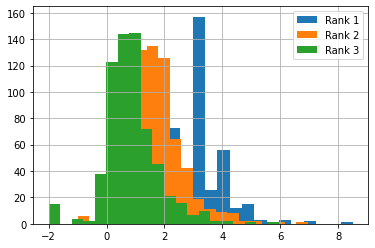

In [40]:
ranks = []
for r, group in neighborhood_df.groupby('rank'):
    ranks += [f'Rank {r}']
    print(f'Average shortest paths difference for rank {r}: {group.shortest_paths_diferences_mean.mean()}')
    group.shortest_paths_diferences_mean.hist(bins=20)
plt.legend(ranks)

## Number of aspects pairs [aspect_graph x conceptnet]

In [43]:
len(list(flatten(neighborhood_df.neighbors_cn_path_lens.tolist())))

447688

## Histograms per each shortest path len 

### ConeptNet distances

Text(0.5, 0, 'Shortest path len')

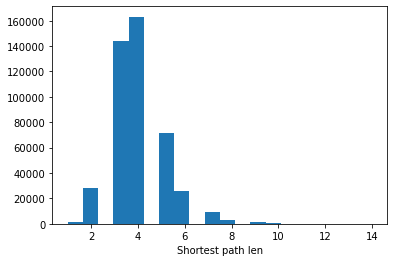

In [44]:
plt.hist(
    list(flatten(neighborhood_df.neighbors_cn_path_lens.tolist())),
    bins=20
)
plt.xlabel('Shortest path len')

### Difference in shortest paths [aspect_graph x conceptnet]

Text(0.5, 0, 'Shortest paths difference')

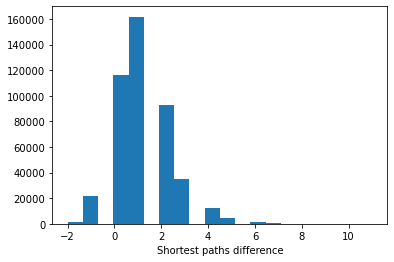

In [45]:
plt.hist(
    list(flatten(neighborhood_df.shortest_paths_diferences.tolist())),
    bins=20
)
plt.xlabel('Shortest paths difference')

## Per each rank

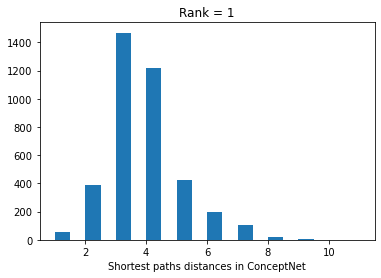

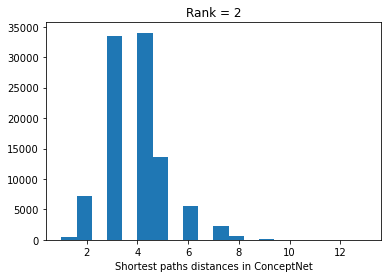

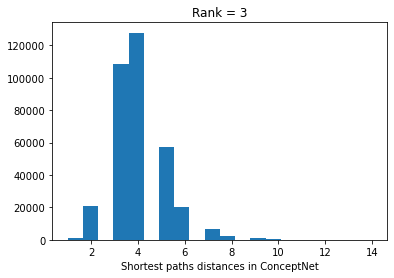

In [46]:
for r, group in neighborhood_df.groupby('rank'):
    fig = plt.figure()
    plt.hist(
        list(flatten(group.neighbors_cn_path_lens.tolist())),
        bins=20
    )
    plt.xlabel('Shortest paths distances in ConceptNet')
    plt.title(f'Rank = {r}')